<a href="https://colab.research.google.com/github/Egor-Error000/-2013-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Болонкин Егор Владиславович

Анализ данных по рейсам в ряд аэропортов 2013 года

# ***Задание 1***

При исследовании данных важно учитывать потерянные значения, то есть данные, которые отсутствуют. В данном случае пропущенные значения имеются в колонках: dep_time, dep_delay, arr_time, arr_delay, talinum и air_time. Общее количество строк с хотя бы одним пропущенным значением составляет 9430.

Анализ данных показал, что не удалось обнаружить особенности в рейсах с пропущенными значениями. Однако было интересно выяснить, что количество пропущенных значений зависит от авиакомпании. Составлен топ авиакомпаний по количеству потерянных значений.

Информация о потерянных данных по авиакомпаниям имеет важное значение. Пропущенные значения в колонках времени вылета и задержки указывают на отмененные рейсы. Пропущенные значения в колонках времени прилета и задержки говорят о рейсах, которые не достигли пункта назначения, возможно, из-за плохих погодных условий, требующих посадки в другом аэропорту. Отсутствующие бортовые номера свидетельствуют о недостаточной ответственности персонала авиакомпании. Эта информация важна для пассажиров, так как они могут оценить риск задержки или отмены своего рейса. Однако общее количество потерянных данных во всех полях невелико, что свидетельствует о низкой вероятности отмены полета.

In [ ]:
import pandas as pd
import numpy as np

# Загрузка данных
df = pd.read_csv('flights_NY.csv')

# Проверка наличия пропущенных значений в каждой колонке
print(df.isnull().sum())

# Количество строк с хотя бы одним пропущенным значением
print(df.isnull().any(axis=1).sum())

# Рейсы с пропущенными значениями
print(df[df.isnull().any(axis=1)])

# Расчет количества пропущенных значений для каждой авиакомпании и каждого аэропорта
missing_values_by_carrier = df.groupby('carrier')[['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'tailnum', 'air_time']].apply(lambda x: x.isnull().sum()).reset_index().rename(columns={'dep_time': 'missing_dep_time', 'dep_delay': 'missing_dep_delay', 'arr_time': 'missing_arr_time', 'arr_delay': 'missing_arr_delay', 'tailnum': 'missing_tailnum', 'air_time': 'missing_air_time'})

missing_values_by_airport = df.groupby('dest')[['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'tailnum', 'air_time']].apply(lambda x: x.isnull().sum()).reset_index().rename(columns={'dep_time': 'missing_dep_time', 'dep_delay': 'missing_dep_delay', 'arr_time': 'missing_arr_time', 'arr_delay': 'missing_arr_delay', 'tailnum': 'missing_tailnum', 'air_time': 'missing_air_time'})

# Средняя дистанция в строках с пропущенными значениями для каждого аэропорта отдельно для вылета и прилета
missing_distance_by_airport = df[df.isnull().any(axis=1)].groupby('dest')['distance'].mean().reset_index()

# Сортировка пропущенных значений по убыванию
missing_values_by_carrier = missing_values_by_carrier.sort_values(['missing_dep_time', 'missing_dep_delay', 'missing_arr_time', 'missing_arr_delay', 'missing_tailnum', 'missing_air_time'], ascending=False).reset_index(drop=True)
missing_values_by_airport = missing_values_by_airport.sort_values(['missing_dep_time', 'missing_dep_delay', 'missing_arr_time', 'missing_arr_delay', 'missing_tailnum', 'missing_air_time'], ascending=False).reset_index(drop=True)

# Вывод первых 25 записей
print("Топ 25 авиакомпаний с наибольшим количеством пропущенных значений:")
print(missing_values_by_carrier.head(25))

# Сортировка средней дистанции по убыванию
missing_distance_by_airport = missing_distance_by_airport.sort_values('distance', ascending=False).reset_index(drop=True)

# Вывод первых 25 аэропортов по средней дистанции
print("\nТоп 25 аэропортов по средней дистанции в строках с пропущенными значениями:")
print(missing_distance_by_airport.head(25))

# Удаление строк с пропущенными значениями
df = df.dropna()

# Сохранение файла без пропущенных значений
df.to_csv('new_flights_NY_1.csv', index=False)











year            0
month           0
day             0
dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
carrier         0
tailnum      2512
flight          0
origin          0
dest            0
air_time     9430
distance        0
dtype: int64
9430
        year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
471     2013      1    1    1525.0       -5.0    1934.0        NaN      MQ   
477     2013      1    1    1528.0       29.0    2002.0        NaN      EV   
615     2013      1    1    1740.0       -5.0    2158.0        NaN      MQ   
643     2013      1    1    1807.0       29.0    2251.0        NaN      UA   
725     2013      1    1    1939.0       59.0      29.0        NaN      9E   
...      ...    ...  ...       ...        ...       ...        ...     ...   
336771  2013      9   30       NaN        NaN       NaN        NaN      9E   
336772  2013      9   30       NaN        NaN       NaN        NaN      9E   
336773  2013      9   30    

# Задание 2

При планировании путешествия важно знать, что время, указанное на билете, может отличаться от реального. Гистограмма показывает относительные значения и помогает оценить вероятность задержки. Выбросы на диаграмме указывают на особенности значений. Важно заметить, что рейсы могут отправляться как с задержкой, так и раньше указанного времени. Это нужно учесть при планировании. Также задержка при прилете может быть значительной, что также влияет на план поездки.

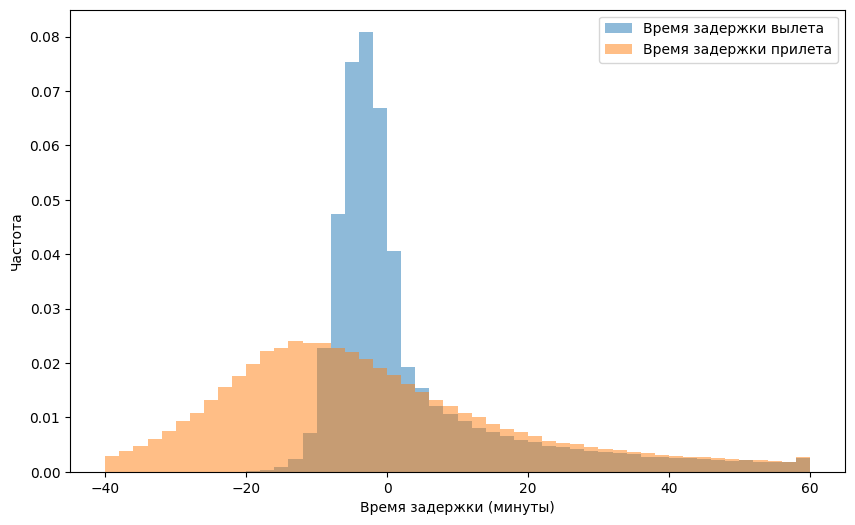

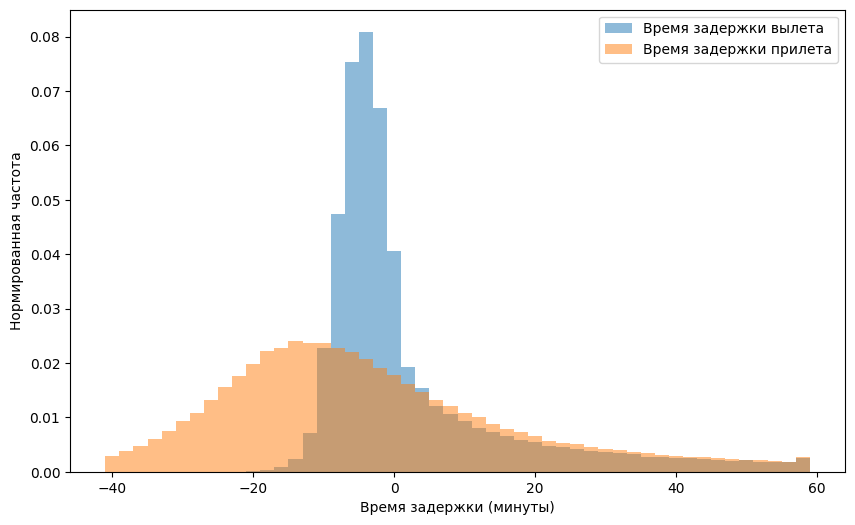

Характер выбросов в колонке 'dep_delay':
        dep_delay
85           47.0
96           39.0
119         101.0
135          71.0
151         853.0
...           ...
327318       74.0
327333      194.0
327336       72.0
327338       80.0
327339      154.0

[42857 rows x 1 columns]

Характер выбросов в колонке 'arr_delay':
        arr_delay
119         137.0
151         851.0
218         123.0
268         145.0
269          78.0
...           ...
327240      105.0
327244      174.0
327300      136.0
327333      194.0
327339      130.0

[27880 rows x 1 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из файла в DataFrame
df = pd.read_csv('new_flights_NY_1.csv')
# Создание новой колонки с датами в формате datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Запись нового датасета в файл
df.to_csv('dataset.csv', index=False)

# Ограничение диапазона значений для построения гистограмм
dep_delay_range = (-40, 60)  # Диапазон значений времени задержки вылета
arr_delay_range = (-40, 60)  # Диапазон значений времени задержки прилета

# Построение гистограмм
fig, ax = plt.subplots(figsize=(10, 6))

# Нормированная гистограмма времени задержки вылета
dep_delay_hist, dep_delay_bins, _ = ax.hist(df['dep_delay'], bins=50, range=dep_delay_range, alpha=0.5, label='Время задержки вылета', density=True)

# Нормированная гистограмма времени задержки прилета
arr_delay_hist, arr_delay_bins, _ = ax.hist(df['arr_delay'], bins=50, range=arr_delay_range, alpha=0.5, label='Время задержки прилета', density=True)

ax.set_xlabel('Время задержки (минуты)')
ax.set_ylabel('Частота')
ax.legend(loc='upper right')

# Нормировка значений гистограмм
dep_delay_bin_width = dep_delay_bins[1] - dep_delay_bins[0]
arr_delay_bin_width = arr_delay_bins[1] - arr_delay_bins[0]
dep_delay_hist_normalized = dep_delay_hist / (dep_delay_bin_width * dep_delay_hist.sum())
arr_delay_hist_normalized = arr_delay_hist / (arr_delay_bin_width * arr_delay_hist.sum())

# Вывод нормированной гистограммы
fig, ax = plt.subplots(figsize=(10, 6))

# Нормированная гистограмма времени задержки вылета
ax.bar(dep_delay_bins[:-1], dep_delay_hist_normalized, width=dep_delay_bin_width, alpha=0.5, label='Время задержки вылета')

# Нормированная гистограмма времени задержки прилета
ax.bar(arr_delay_bins[:-1], arr_delay_hist_normalized, width=arr_delay_bin_width, alpha=0.5, label='Время задержки прилета')

ax.set_xlabel('Время задержки (минуты)')
ax.set_ylabel('Нормированная частота')
ax.legend(loc='upper right')

plt.show()

# Вывод описательной статистики для времени задержки вылета и прилета
delay_stats = df[['dep_delay', 'arr_delay']].describe(percentiles=[0.01, 0.25, 0.50, 0.75, 0.99])

#Определение выбросов
dep_delay_iqr = delay_stats.loc['75%','dep_delay'] - delay_stats.loc['25%','dep_delay']
arr_delay_iqr = delay_stats.loc['75%','arr_delay'] - delay_stats.loc['25%','arr_delay']

dep_delay_lower_threshold = delay_stats.loc['25%','dep_delay'] - 1.5 * dep_delay_iqr
dep_delay_upper_threshold = delay_stats.loc['75%','dep_delay'] + 1.5 * dep_delay_iqr

arr_delay_lower_threshold = delay_stats.loc['25%','arr_delay'] - 1.5 * arr_delay_iqr
arr_delay_upper_threshold = delay_stats.loc['75%','arr_delay'] + 1.5 * arr_delay_iqr

dep_delay_outliers = df[(df['dep_delay'] < dep_delay_lower_threshold) | (df['dep_delay'] > dep_delay_upper_threshold)]
arr_delay_outliers = df[(df['arr_delay'] < arr_delay_lower_threshold) | (df['arr_delay'] > arr_delay_upper_threshold)]

#Вывод информации о выбросах
print("Характер выбросов в колонке 'dep_delay':")
print(dep_delay_outliers[['dep_delay']])
print()
print("Характер выбросов в колонке 'arr_delay':")
print(arr_delay_outliers[['arr_delay']])





# Задание 3

Средние значения помогают получить общую картину, но не учитывают специфические случаи.

Задержки в данных имеют небольшое значение (менее 2% от среднего времени полета) и не играют важной роли при планировании перелета. Однако стоит учесть, что стандартное отклонение достаточно большое, и задержки могут быть как положительными, так и отрицательными. Это существенно влияет на планы. Такие величины вполне естественны в сложной организации авиаперевозок.

In [ ]:
import pandas as pd

# Загрузка данных из файла в DataFrame
df = pd.read_csv('dataset.csv')

# Оценка среднего значения, медианы и стандартного отклонения для времени задержки вылета
dep_delay_mean = df['dep_delay'].mean()
dep_delay_median = df['dep_delay'].median()
dep_delay_std = df['dep_delay'].std()

print('Время задержки вылета:')
print('Среднее значение: ', dep_delay_mean)
print('Медиана: ', dep_delay_median)
print('Стандартное отклонение: ', dep_delay_std)

# Оценка среднего значения, медианы и стандартного отклонения для времени задержки прилета
arr_delay_mean = df['arr_delay'].mean()
arr_delay_median = df['arr_delay'].median()
arr_delay_std = df['arr_delay'].std()

print('Время задержки прилета:')
print('Среднее значение: ', arr_delay_mean)
print('Медиана: ', arr_delay_median)
print('Стандартное отклонение: ', arr_delay_std)


Время задержки вылета:
Среднее значение:  10.816993697715038
Медиана:  -2.0
Стандартное отклонение:  37.001552449299425
Время задержки прилета:
Среднее значение:  5.935879102358505
Медиана:  -4.0
Стандартное отклонение:  41.095782081583046


# Задание 4

Средние значения задержек сильно зависят от авиакомпании и являются важным фактором при выборе перевозчика, наряду с качеством обслуживания и ценой билета. График представляет среднее время задержки вылета для каждой авиакомпании, позволяя сравнить их пунктуальность и оценить ожидаемую задержку. Значения отличаются значительно (до 2 раз), что указывает на отношение компаний к своей работе.


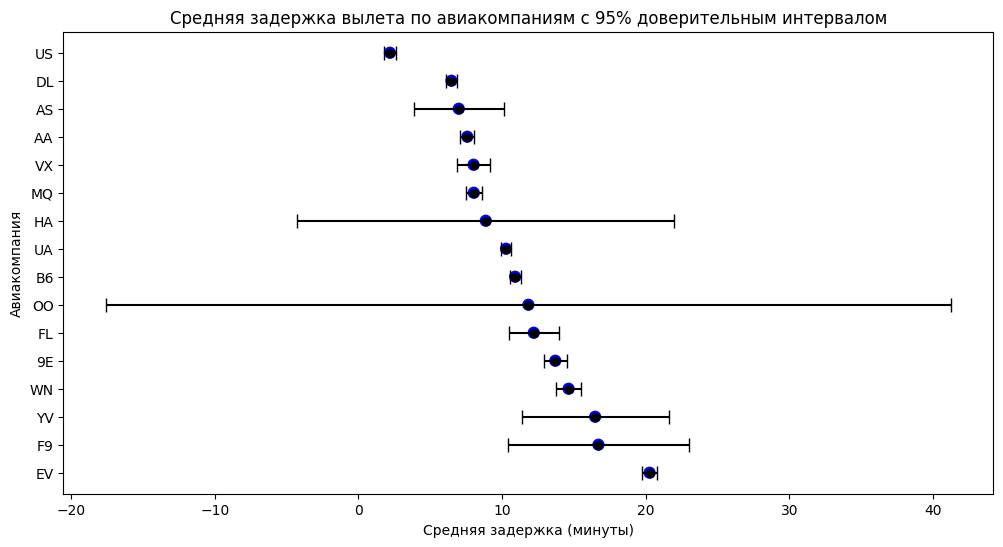

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

#Загрузка данных
df = pd.read_csv('new_flights_NY_1.csv')

#Расчет среднего значения и интервала доверия для каждой авиакомпании
mean_delay_by_airline = df.groupby('carrier')['dep_delay'].mean()
confidence_interval_by_airline = df.groupby('carrier')['dep_delay'].apply(lambda x: stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=stats.sem(x)))

#Создание нового DataFrame с авиакомпанией, средней задержкой и интервалом доверия
airline_delay = pd.DataFrame({'Средняя задержка': mean_delay_by_airline, 'Интервал доверия': confidence_interval_by_airline})

#Сортировка авиакомпаний по возрастанию средней задержки
airline_delay = airline_delay.sort_values('Средняя задержка')

#Построение графика средней задержки и интервала доверия для каждой авиакомпании
fig, ax = plt.subplots(figsize=(12, 6))
sns.pointplot(x='Средняя задержка', y=airline_delay.index, data=airline_delay, join=False, ax=ax, color='blue')
ax.errorbar(airline_delay['Средняя задержка'], airline_delay.index, xerr=[airline_delay['Средняя задержка'] - airline_delay['Интервал доверия'].apply(lambda x: x[0]),
airline_delay['Интервал доверия'].apply(lambda x: x[1]) - airline_delay['Средняя задержка']],
fmt='o', color='black', capsize=5)

ax.set_xlabel('Средняя задержка (минуты)')
ax.set_ylabel('Авиакомпания')
ax.set_title('Средняя задержка вылета по авиакомпаниям с 95% доверительным интервалом')

plt.show()


# Задание 5

Сравнение среднего времени задержек между American Airlines и Delta Airlines показывает, что разница в 2 минуты не является значимой для пассажира. Однако, проведенный тест Стьюдента показал, что различие в средних задержках статистически значимо. Гипотезу о равенстве средних можно отвергнуть при уровне значимости 0.05. Подбирать другой уровень значимости для статистической незначимости не имеет смысла, так как уменьшая мы будем значительно увеличивать ошибку второго рода.


In [ ]:
import pandas as pd
from scipy import stats

# Загрузка данных
df = pd.read_csv('new_flights_NY_1.csv')

# Извлечение значений времени задержки вылета для American Airlines (AA) и Delta Airlines (DL)
aa_delay = df[df['carrier'] == 'AA']['dep_delay']
dl_delay = df[df['carrier'] == 'DL']['dep_delay']

# Проведение независимого t-теста
t_statistic, p_value = stats.ttest_ind(aa_delay, dl_delay)

# Уровень значимости
alpha = 0.05

# Сравнение p-значения с уровнем значимости
if p_value < alpha:
    print("Значимое различие в среднем времени задержки вылета между American Airlines (AA) и Delta Airlines (DL) на уровне значимости", alpha)
    print("Отвергаем нулевую гипотезу о равенстве средних.")
else:
    print("Незначимое различие в среднем времени задержки вылета между American Airlines (AA) и Delta Airlines (DL) на уровне значимости", alpha)
    print("Не отвергаем нулевую гипотезу о равенстве средних.")

# Вывод результатов теста
print("Значимость различия в среднем времени задержки вылета:")
print("t-статистика:", t_statistic)
print("p-значение:", p_value)



Значимое различие в среднем времени задержки вылета между American Airlines (AA) и Delta Airlines (DL) на уровне значимости 0.05
Отвергаем нулевую гипотезу о равенстве средних.
Значимость различия в среднем времени задержки вылета:
t-статистика: 3.3603795294185663
p-значение: 0.0007789687867752572


# Задание 6

При анализе задержек вылетов для аэропортов Нью-Йорка были проведены сравнения как для группы трех аэропортов, так и для каждой пары аэропортов. Анализ группы с помощью ANOVA показал статистически незначимые различия (р-значение 6.4 при alpha=0.05), возможно из-за большой дисперсии в группе. Однако, при попарном сравнении всех аэропортов различия статистически значимы.

In [ ]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Загрузка данных
df = pd.read_csv('new_flights_NY_1.csv')

# Фильтрация данных по аэропортам вылета
jfk_delay = df[df['origin'] == 'JFK']['dep_delay']
lga_delay = df[df['origin'] == 'LGA']['dep_delay']
ewr_delay = df[df['origin'] == 'EWR']['dep_delay']

# Проведение однофакторного дисперсионного анализа (ANOVA)
fvalue, pvalue = stats.f_oneway(jfk_delay, lga_delay, ewr_delay)

# Уровень значимости
alpha = 0.05

# Вывод результатов ANOVA
print("Однофакторный дисперсионный анализ (ANOVA) для задержек вылетов по аэропортам:")
print("Статистика F:", fvalue)
print("p-значение:", pvalue)

# Проведение пост-хок теста для определения попарных различий
# Используем метод Tukey HSD для коррекции множественных сравнений
mc = sm.stats.multicomp.MultiComparison(df['dep_delay'], df['origin'])
posthoc_result = mc.tukeyhsd()

# Вывод результатов пост-хок теста
print("Попарные различия между аэропортами (метод Tukey HSD):")
print(posthoc_result)

# Определение значимых различий
significant_differences = posthoc_result.reject
significant_pairs = []
num_groups = len(df['origin'].unique())

if any(significant_differences):
    print("Обнаружены статистически значимые различия в задержках вылетов между некоторыми аэропортами.")
    print("Значимые попарные различия:")
    for i in range(num_groups):
        for j in range(i+1, num_groups):
            if significant_differences[i]:
                airport1 = df['origin'].unique()[i]
                airport2 = df['origin'].unique()[j]
                significant_pairs.append((airport1, airport2))
                print(f"{airport1} - {airport2}")
else:
    print("Нет статистически значимых различий в задержках вылетов между аэропортами.")





Однофакторный дисперсионный анализ (ANOVA) для задержек вылетов по аэропортам:
Статистика F: 392.3539088643125
p-значение: 6.408773574198642e-171
Попарные различия между аэропортами (метод Tukey HSD):
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   EWR    JFK  -2.9855   0.0 -3.3802 -2.5909   True
   EWR    LGA  -4.7225   0.0 -5.1251 -4.3199   True
   JFK    LGA   -1.737   0.0 -2.1464 -1.3276   True
---------------------------------------------------
Обнаружены статистически значимые различия в задержках вылетов между некоторыми аэропортами.
Значимые попарные различия:
EWR - LGA
EWR - JFK
LGA - JFK


# Задание 7

При анализе распределения задержек было обнаружено, что оно имеет убывающую форму с нелинейным и резким спадом, но без явных разрывов. Исходя из этих наблюдений, было принято решение аппроксимировать распределение с помощью Вейбулл-распределения.

Форма определяет форму распределения, где значение менее 1 указывает на убывающую плотность вероятности. Сдвиг отражает смещение распределения по оси x, а масштаб отвечает за масштабирование и растяжение распределения.

После оценки параметров Вейбулл-распределения, полученное распределение и его параметры помогут определить вероятность различных задержек и играют важную роль при построении модели прогнозирования.


Параметры Вейбулл-распределения:
Форма (shape): 0.6868528056908316
Сдвиг (location): 3.9999999999999996
Масштаб (scale): 23.28753903492153



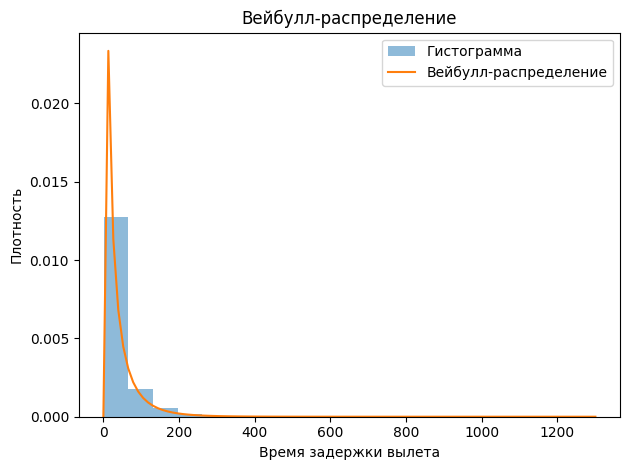

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Загрузка данных времени задержки вылета > 0
delay_data = df[df['dep_delay'] > 0]['dep_delay']

# Оценка параметров Лог-нормального распределения
lognorm_params = stats.lognorm.fit(delay_data)
lognorm_shape, lognorm_loc, lognorm_scale = lognorm_params

# Оценка параметров Вейбулла-распределения
weibull_params = stats.weibull_min.fit(delay_data)
weibull_shape, weibull_loc, weibull_scale = weibull_params

# Создание массива значений для построения графика плотности
x = np.linspace(0, delay_data.max(), 100)

# Создание массива значений для построения графика плотности
x = np.linspace(0, delay_data.max(), 100)

# Построение гистограммы и графика плотности для Вейбулла-распределения
plt.subplot(1, 1, 1)
plt.hist(delay_data, bins=20, density=True,alpha=0.5, label='Гистограмма')
plt.plot(x, stats.weibull_min.pdf(x, weibull_shape, weibull_loc, weibull_scale), label='Вейбулл-распределение')
plt.xlabel('Время задержки вылета')
plt.ylabel('Плотность')
plt.title('Вейбулл-распределение')
plt.legend()

#Вывод параметров Вейбулл-распределения
print("Параметры Вейбулл-распределения:")
print("Форма (shape):", weibull_shape)
print("Сдвиг (location):", weibull_loc)
print("Масштаб (scale):", weibull_scale)
print()

plt.tight_layout()

#Отображение графиков
plt.show()




# Задание 8

Проведен анализ, который позволяет изучить связь между количеством рейсов и средним временем задержек. Построены графики зависимости этих двух величин от месяца, и рассчитан коэффициент корреляции.

Графики позволяют наглядно представить количество рейсов и среднее время задержек в каждом месяце. Полученный коэффициент корреляции указывает на наличие связи между этими переменными, хотя она не является строго линейной (так как коэффициент корреляции равен 0.09, далеко от 1). Однако, можно предположить, что в некотором приближении зависимость может быть линейной.

Таким образом, результаты анализа позволяют предположить, что количество рейсов влияет на среднее время задержек, хотя эта связь не является прямой и может быть более сложной

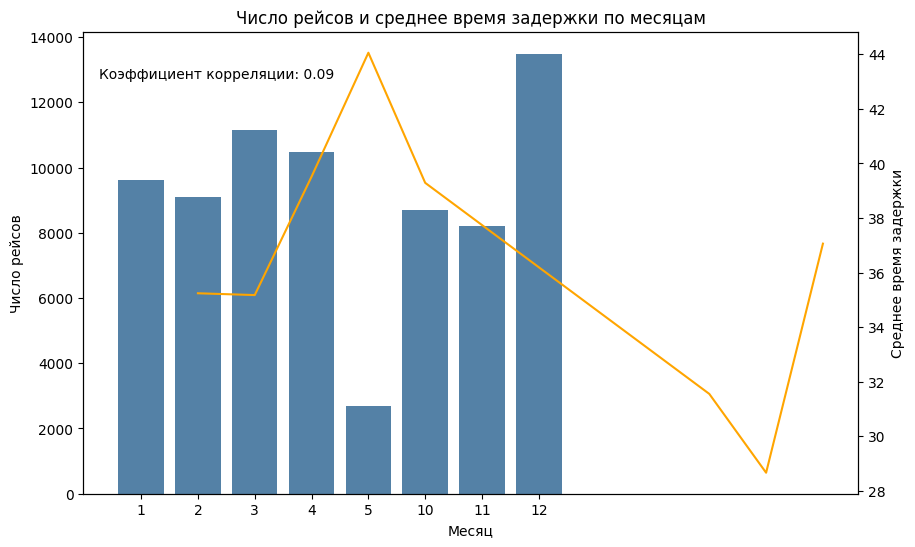

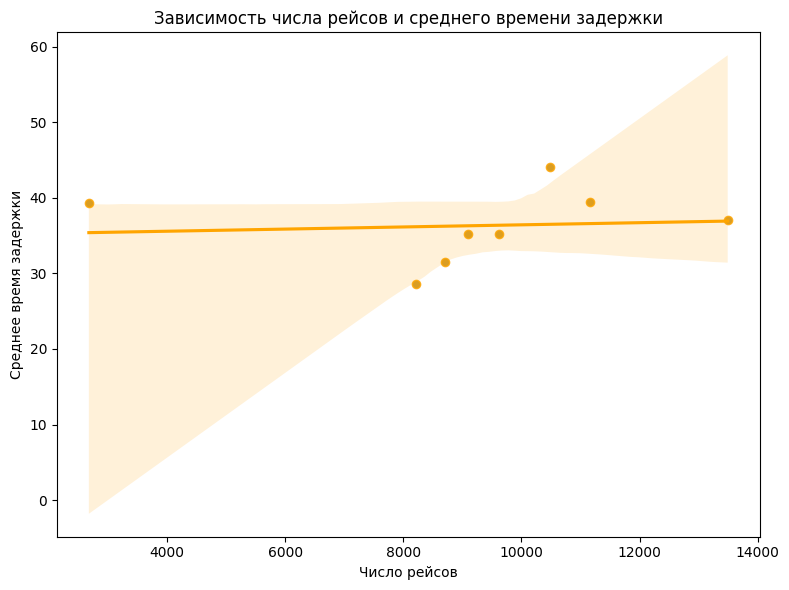

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Загрузка данных
df = pd.read_csv('new_flights_NY_1.csv')

# Фильтрация данных для рейсов с задержкой вылета > 0
delayed_flights = df[df['dep_delay'] > 0]

# Группировка данных по месяцу и вычисление числа рейсов в месяц и среднего времени задержки
monthly_data = delayed_flights.groupby('month').agg({'flight': 'count', 'dep_delay': 'mean'}).reset_index()

# Построение графиков числа рейсов в месяц и среднего времени задержки
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

sns.barplot(x='month', y='flight', data=monthly_data, ax=ax1, color='steelblue')
ax1.set_ylabel('Число рейсов')
ax1.set_xlabel('Месяц')
ax1.set_title('Число рейсов и среднее время задержки по месяцам')

sns.lineplot(x='month', y='dep_delay', data=monthly_data, ax=ax2, color='orange')
ax2.set_ylabel('Среднее время задержки')

# Вычисление коэффициента корреляции
correlation_coefficient = monthly_data['flight'].corr(monthly_data['dep_delay'])
ax1.text(0.02, 0.9, f'Коэффициент корреляции: {correlation_coefficient:.2f}', transform=ax1.transAxes)

# Построение точечной диаграммы и линии регрессии
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flight', y='dep_delay', data=monthly_data, color='steelblue')
sns.regplot(x='flight', y='dep_delay', data=monthly_data, color='orange')

plt.xlabel('Число рейсов')
plt.ylabel('Среднее время задержки')
plt.title('Зависимость числа рейсов и среднего времени задержки')
plt.tight_layout()

# Отображение графиков
plt.show()



# Задание 9

Из графика видно , что среднее время задержки имеет свой пик в обеденный перерыв  , за исключением этого пика оно убывает на протяжении всего дня , резко падая в 10.
Доля же рейсов с опазданием как раз наоборот увеличивается на протяжении всего дня имея несколько перепадов .    
Это надо будет учитывать при покупке Билетов .


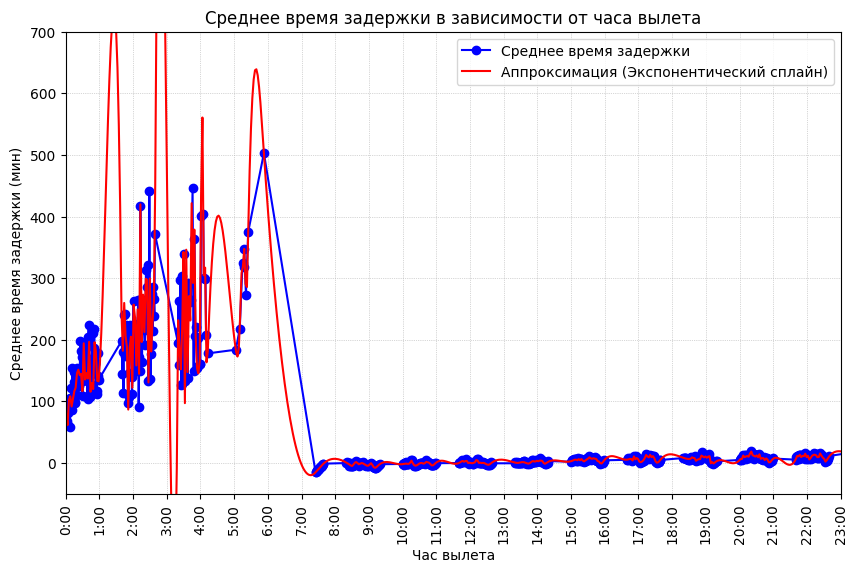

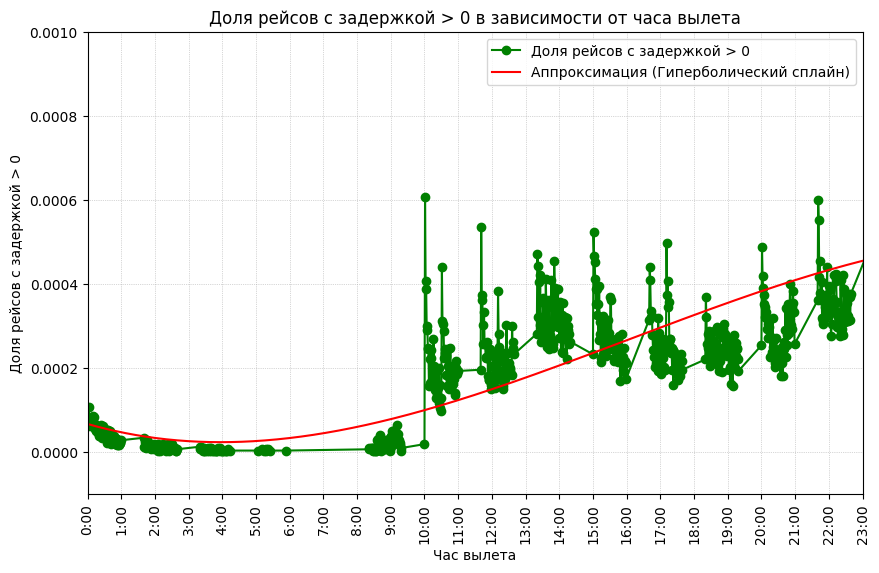

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import UnivariateSpline

# Загрузка данных
data = pd.read_csv('dataset.csv')

# Подсчет среднего времени задержки для каждого часа вылета
mean_delay_by_hour = data.groupby('dep_time')['dep_delay'].mean()

# График среднего времени задержки в зависимости от часа вылета
plt.figure(figsize=(10, 6))
plt.plot(mean_delay_by_hour.index, mean_delay_by_hour.values, 'bo-', label='Среднее время задержки')
plt.xlabel('Час вылета')
plt.ylabel('Среднее время задержки (мин)')
plt.xticks(mean_delay_by_hour.index, rotation='vertical')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5)
plt.title('Среднее время задержки в зависимости от часа вылета')
plt.ylim(-50, 700)  # Изменение пределов оси Oy

# Форматирование меток оси x и задание диапазона значений
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60))  # Используем MultipleLocator с шагом 60
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '%d:%02d' % divmod(x, 60)))  # Форматирование меток времени
plt.xlim(0, 23 * 60)  # Изменение пределов оси Ox в минутах (от 0 до 23 часов * 60 минут)

# Аппроксимация графика экспонентическим сплайном
spline_exp = UnivariateSpline(mean_delay_by_hour.index, mean_delay_by_hour.values, k=3, s=None, ext=0)
x_new = np.linspace(mean_delay_by_hour.index.min(), mean_delay_by_hour.index.max(), 1000)
y_new_exp = spline_exp(x_new)
plt.plot(x_new, y_new_exp, 'r-', label='Аппроксимация (Экспонентический сплайн)')
plt.legend()

plt.show()

# Подсчет доли рейсов с задержкой для каждого часа вылета от всех рейсов за этот час
delayed_flights_by_hour = data[data['dep_delay'] > 0].groupby('dep_time')['dep_delay'].count()
all_flights_by_hour = data.groupby('dep_time')['dep_delay'].count()
prop_delayed_by_hour = delayed_flights_by_hour / all_flights_by_hour.sum()

# График доли рейсов с задержкой в зависимости от часа вылета
plt.figure(figsize=(10, 6))
plt.plot(prop_delayed_by_hour.index, prop_delayed_by_hour.values, 'go-', label='Доля рейсов с задержкой > 0')
plt.xlabel('Час вылета')
plt.ylabel('Доля рейсов с задержкой > 0')
plt.xticks(prop_delayed_by_hour.index, rotation='vertical')
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5)
plt.title('Доля рейсов с задержкой > 0 в зависимости от часа вылета')
plt.ylim(-0.0001, 0.001)  # Изменение пределов оси Oy

# Форматирование меток оси x и задание диапазона значений
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(60))  # Используем MultipleLocator с шагом 60
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '%d:%02d' % divmod(x, 60)))  # Форматирование меток времени
plt.xlim(0, 23 * 60)  # Изменение пределов оси Ox в минутах (от 0 до 23 часов * 60 минут)

# Аппроксимация графика гиперболическим сплайном
spline_hyp = UnivariateSpline(prop_delayed_by_hour.index, prop_delayed_by_hour.values, k=3, s=None, ext=0)
y_new_hyp = spline_hyp(x_new)
plt.plot(x_new, y_new_hyp, 'r-', label='Аппроксимация (Гиперболический сплайн)')
plt.legend()

plt.show()
















# Задание  10

Авиаперевозки не могут быть без задержек. Компании могут быть пунктуальными или нет, и это можно определить по среднему времени задержки. Особенно это заметно на коротких дистанциях, где пороговое значение для приемлемого времени задержки составляет 40 минут. Гистограммы позволяют визуализировать разницу в задержках между компаниями, причем эта разница может меняться в зависимости от дистанции полета. Некоторые компании сохраняют свою пунктуальность на всех уровнях задержек.

Пунктуальные авиакомпании по группам дальности перелета:
Группа short(<500): ['AA', 'UA', 'US', 'WN']
Группа medium(500,1500): ['AA', 'FL', 'OO', 'UA', 'US', 'WN']
Группа long(>1500): ['9E', 'AA', 'AS', 'B6', 'DL', 'UA', 'US', 'VX', 'WN']
Непунктуальные авиакомпании по группам дальности перелета:
Группа short(<500): ['9E', 'B6', 'DL', 'EV', 'FL', 'MQ', 'OO', 'YV']
Группа medium(500,1500): ['9E', 'B6', 'DL', 'EV', 'MQ', 'YV']
Группа long(>1500): ['F9', 'HA']


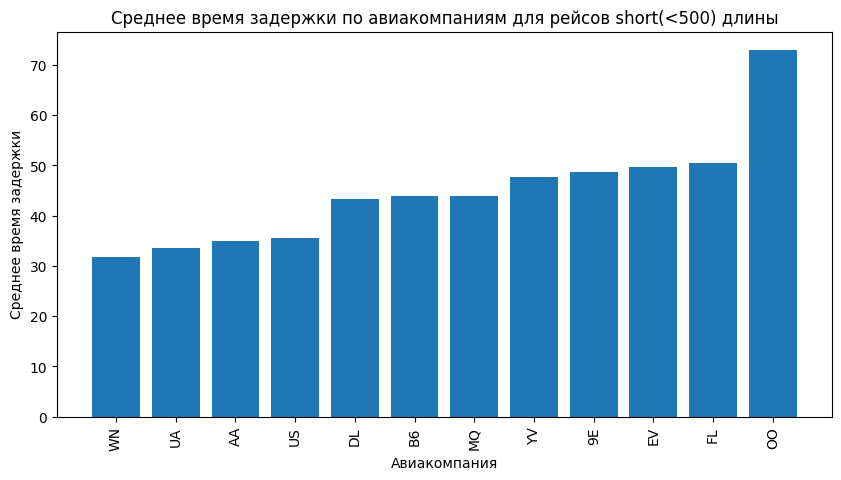

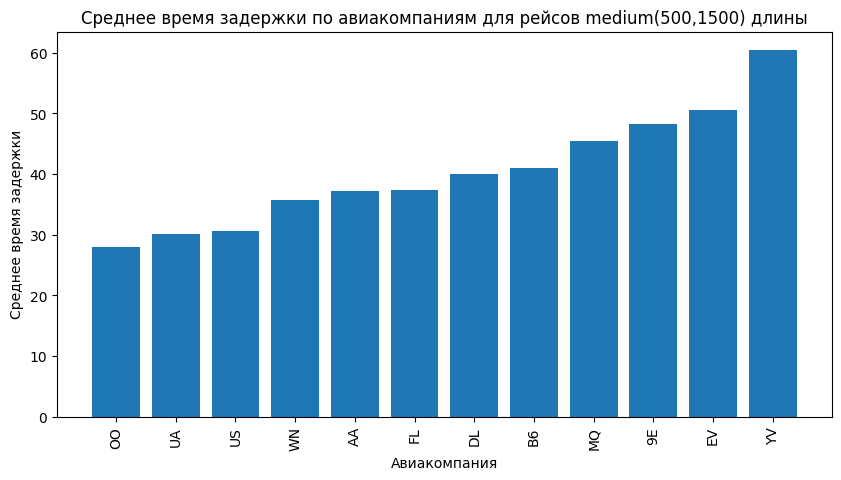

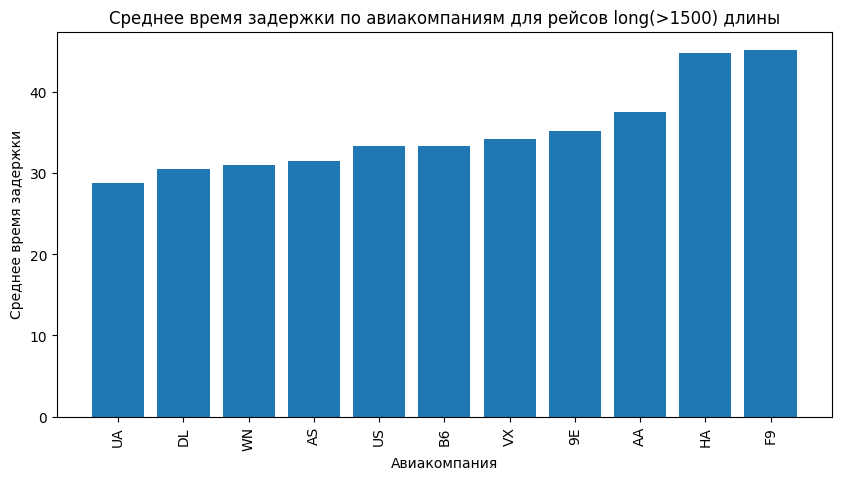

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# загрузка данных
data = pd.read_csv('new_flights_NY_1.csv')

# создание групп по дальности перелета
bins = [-float("inf"), 500, 1500, float("inf")]  # короткие, средние, длинные рейсы
labels = ["short(<500)", "medium(500,1500)", "long(>1500)"]
data["flight_distance_group"] = pd.cut(data["distance"], bins=bins, labels=labels)

# расчет среднего времени задержки для каждой авиакомпании в каждой группе
grouped = data[data["dep_delay"] > 0].groupby(["flight_distance_group", "carrier"])
avg_delay = grouped["dep_delay"].mean()

# определение пунктуальных и непунктуальных авиакомпаний для каждой группы
threshold = 40  # пороговое значение среднего времени задержки
punctual = {}
non_punctual ={}
for group in avg_delay.index.levels[0]:
    group_avg_delay = avg_delay[group]
    punctual[group] = group_avg_delay[group_avg_delay <= threshold].index.tolist()
    non_punctual[group] = group_avg_delay[group_avg_delay > threshold].index.tolist()

#вывод результатов
print("Пунктуальные авиакомпании по группам дальности перелета:")
for group, carriers in punctual.items():
    print(f"Группа {group}: {carriers}")

print("Непунктуальные авиакомпании по группам дальности перелета:")
for group, carriers in non_punctual.items():
    print(f"Группа {group}: {carriers}")

#графики
for group in labels:
   group_avg_delay = avg_delay[group].sort_values()
   plt.figure(figsize=(10, 5))
   plt.bar(group_avg_delay.index, group_avg_delay.values)
   plt.title(f"Среднее время задержки по авиакомпаниям для рейсов {group} длины")
   plt.xlabel("Авиакомпания")
   plt.ylabel("Среднее время задержки")
   plt.xticks(rotation=90)
   plt.show()



# Задание 11

Для построения модели и создания прогноза среднего времени заддержки рейсов на последний Декабря 2013 года было решено сделать следующее  
 -> создать свою модель для каждого аэропорта , для которого будет делаться прогноз
 -> поскольку мы выяснили , что время задержки зависит от авиокомпании , то будем считать количество рейсов каждой авиакомпании за день , после взяв эти данные из дня , на который составляется прогноз (эта информация доступна из расписания , поэтому мы можем её использовать)
 -> Выбор данных, связанных с текущим аэропортом.

 -> Разделение данных на обучающую и тестовую выборки.

 -> Создание пайплайна, который объединяет преобразование признаков и модель линейной регрессии.
Определение сетки параметров для перебора, в данном случае только параметр 'fit_intercept' модели линейной регрессии. Линейная регрессия была выбрана потому , что она самая простая и быстрая и даёт неплохой результат.

 -> Подбор гиперпараметров модели с использованием перекрестной проверки (GridSearchCV).

 -> Получение лучшей модели с оптимальными значениями гиперпараметров.

 -> Прогнозирование задержек прилета на тестовой выборке.

 -> Оценка качества модели с использованием метрик MSE
(среднеквадратичная ошибка), MAE (средняя абсолютная ошибка) и R2 (коэффициент детерминации).
Вывод прогнозов и фактических значений для текущего аэропорта.

 -> Вывод дополнительной информации: Для каждого аэропорта выводятся фактические значения средней задержки прилета, количество рейсов и прогнозируемая задержка прилета для фиксированных данных (2013 год, 12 месяц, 31 день, первый уникальный перевозчик, текущий аэропорт и среднее время задержки вылета по всем рейсам).

В результате модель позволяет прогнозировать задержки прилета для каждого аэропорта на основе доступных данных, а также оценивать качество модели и сравнивать прогнозы с фактическими значениями.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Загрузка данных
data = pd.read_csv('new_flights_NY_1.csv')

#Создание словаря средних задержек по аэропортам
avg_delay_by_airport = data.groupby('origin')['arr_delay'].mean().to_dict()

#Создание словаря с количеством рейсов по аэропортам
num_flights_by_airport = data['origin'].value_counts().to_dict()

#Для каждого аэропорта строим свою модель
for airport in data['origin'].unique():
    # Выбор данных для текущего аэропорта
    airport_data = data[(data['origin'] == airport) | (data['dest'] == airport)]
    # Проверка количества записей
    if len(airport_data) <= 1:
        print(f"Skipping airport {airport} due to insufficient data.")
        continue
    # Выбор признаков
    X = airport_data[['year', 'month', 'day', 'carrier', 'dest', 'dep_delay']]
    y = airport_data['arr_delay']
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define the column transformer
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, ['year', 'month', 'day', 'dep_delay']),
            ('cat', categorical_transformer, ['carrier', 'dest'])
        ])

    # Создание пайплайна для преобразования и обучения модели
    pipeline = Pipeline([
     ('preprocessor', preprocessor),
     ('regressor', LinearRegression())
    ])

    # Определение сетки параметров для перебора
    param_grid = {
       'regressor__fit_intercept': [True, False]
    }
    # Подбор гиперпараметров с использованием перекрестной проверки
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Лучшая модель с найденными оптимальными значениями гиперпараметров
    best_model = grid_search.best_estimator_

    # Прогнозирование задержек прилета
    y_pred = best_model.predict(X_test)

    # Оценка качества модели
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"MSE for airport {airport}: {mse:.2f}")
    print(f"MAE for airport {airport}: {mae:.2f}")
    print(f"R-squared for airport {airport}: {r2:.2f}")

    # Вывод прогнозов и фактических значений для текущего аэропорта
    X_pred = pd.DataFrame({
     'year': [2013],
     'month': [12],
     'day': [31],
     'carrier': [X_test['carrier'].unique()[0]],
     'dest': [airport],
     'dep_delay': [X_test['dep_delay'].mean()]
    })

    y_pred = best_model.predict(X_pred)

    print(f'Прогноз задержки прилета для аэропорта {airport}: {y_pred[0]} мин')

    # Вывод фактических значений средней задержки прилета
    delay = avg_delay_by_airport[airport]
    print(f'Фактическая задержка прилета для аэропорта {airport}: {delay} мин')

    # Вывод количества рейсов для аэропорта
    num_flights = num_flights_by_airport[airport]
    print(f'Количество рейсов для аэропорта {airport}: {num_flights}')

    print('---------------------------------------------------------------------')





MSE for airport EWR: 280.62
MAE for airport EWR: 12.10
R-squared for airport EWR: 0.87
Прогноз задержки прилета для аэропорта EWR: 9.43716692627845 мин
Фактическая задержка прилета для аэропорта EWR: 9.107054735458092 мин
Количество рейсов для аэропорта EWR: 117127
---------------------------------------------------------------------
MSE for airport LGA: 300.68
MAE for airport LGA: 12.73
R-squared for airport LGA: 0.85
Прогноз задержки прилета для аэропорта LGA: 2.6632035410661246 мин
Фактическая задержка прилета для аэропорта LGA: 5.783488234130908 мин
Количество рейсов для аэропорта LGA: 101140
---------------------------------------------------------------------
MSE for airport JFK: 353.69
MAE for airport JFK: 13.61
R-squared for airport JFK: 0.82
Прогноз задержки прилета для аэропорта JFK: 8.232839737043712 мин
Фактическая задержка прилета для аэропорта JFK: 5.551481036679838 мин
Количество рейсов для аэропорта JFK: 109079
-----------------------------------------------------------

# Задание 12

Интересно узнать , зивисит ли среднее время задержки от дальности полёта.
Оказывается её нет!
Мы получили наглядное представление о количестве и задержках рейсов для каждой авиакомпании в зависимости от дистанции перелета. Также видно, что некоторые авиакомпании специализируются на определенных типах полетов, а время задержки может отличаться в зависимости от длины полета и авиакомпании.

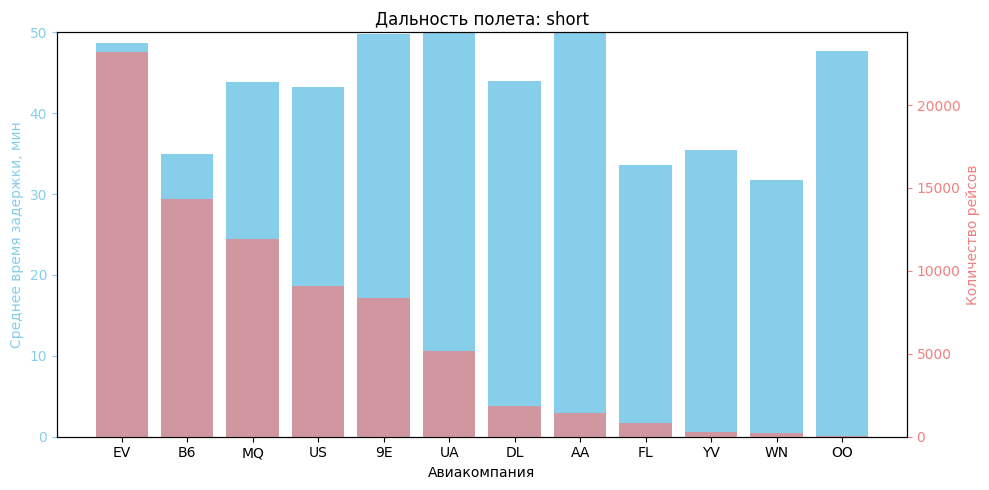

Корреляция между средним временем задержки и дальностью полета (short рейсы): 0.024038740238395837
Не обнаружено существенной зависимости между средним временем задержки и дальностью полета.


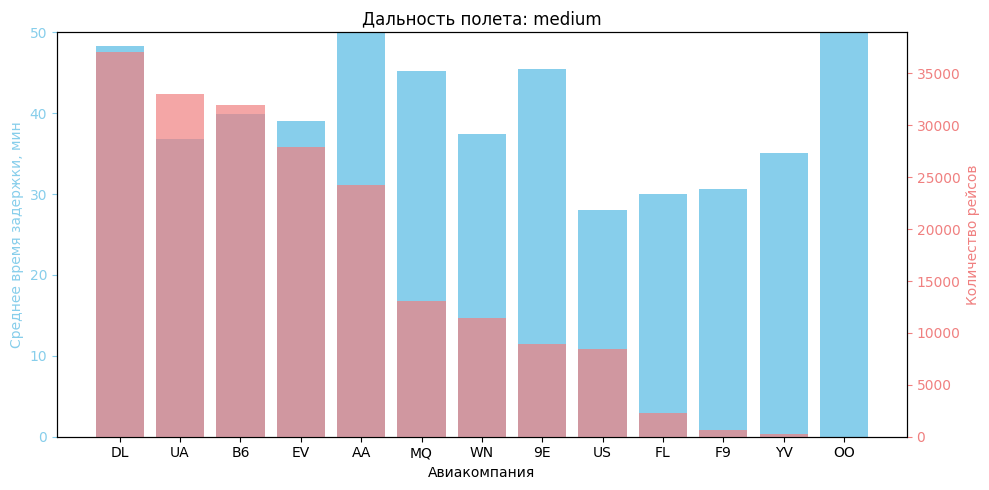

Корреляция между средним временем задержки и дальностью полета (medium рейсы): -0.016181984761629402
Не обнаружено существенной зависимости между средним временем задержки и дальностью полета.


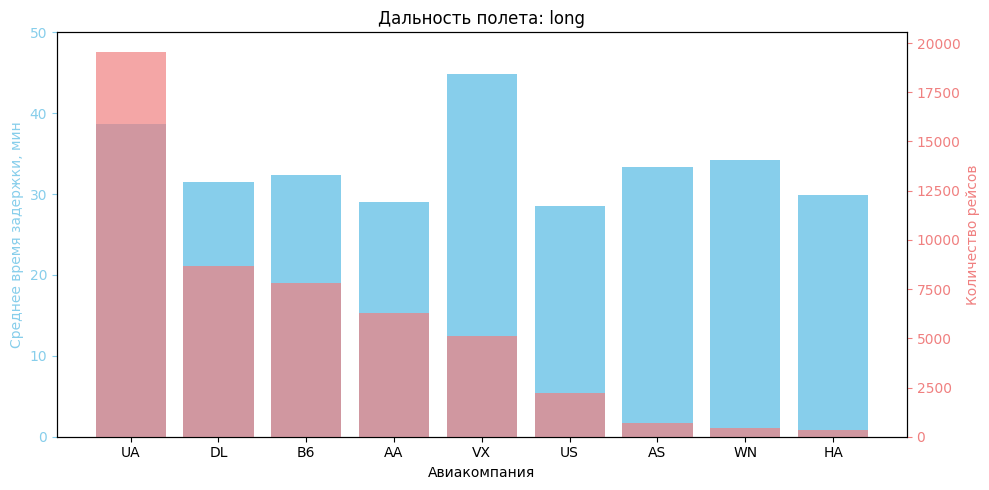

Корреляция между средним временем задержки и дальностью полета (long рейсы): 0.00388814384377524
Не обнаружено существенной зависимости между средним временем задержки и дальностью полета.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# загрузка данных
data = pd.read_csv('new_flights_NY_1.csv')

# создание групп по дальности полета
bins = [-float("inf"), 500, 2000, float("inf")]  # короткие, средние, длинные рейсы
labels = ["short", "medium", "long"]
data["flight_distance_group"] = pd.cut(data["distance"], bins=bins, labels=labels)

# графики среднего времени задержки и количества рейсов для каждой авиакомпании
for group in labels:
    group_data = data[data["flight_distance_group"] == group]

    # расчет среднего времени задержки для каждой авиакомпании
    avg_delay = group_data[group_data["dep_delay"] > 0].groupby("carrier")["dep_delay"].mean()

    # количество рейсов на каждую авиакомпанию
    flight_count = group_data["carrier"].value_counts()

    # построение графика
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # график среднего времени задержки
    ax1.bar(avg_delay.index, avg_delay.values, color='skyblue')
    ax1.set_xlabel('Авиакомпания')
    ax1.set_ylabel('Среднее время задержки, мин', color='skyblue')
    ax1.tick_params('y', colors='skyblue')
    ax1.set_ylim([0, 50])

    # график количества рейсов
    ax2 = ax1.twinx()
    ax2.bar(flight_count.index, flight_count.values, color='lightcoral', alpha=0.7)
    ax2.set_ylabel('Количество рейсов', color='lightcoral')
    ax2.tick_params('y', colors='lightcoral')

    plt.title(f'Дальность полета: {group}')
    plt.tight_layout()
    plt.show()

    # проверка корреляции среднего времени задержки и дальности полета
    correlation = group_data["dep_delay"].corr(group_data["distance"])
    print(f"Корреляция между средним временем задержки и дальностью полета ({group} рейсы): {correlation}")


    # проверка наличия зависимости
    if correlation > 0.5:
       print("Существует положительная зависимость между средним временем задержки и дальностью полета.")
    elif correlation < -0.5:
       print("Существует отрицательная зависимость между средним временем задержки и дальностью полета.")
    else:
       print("Не обнаружено существенной зависимости между средним временем задержки и дальностью полета.")



